# Factors Affecting Airline Satisfaction

#### By Justin Hector

In this analysis, we investigate the factors which lead to a passenger being satisfied or not satisfied on an airline. The analysis will be conducted on the Airline Passenger Satisfaction dataset which can be found [here](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction).

#### About The Dataset

- <span style="Color:red">**Gender**</span>: Gender of the passengers (Female, Male)
- <span style="Color:red">**Customer Type**</span>: The customer type (Loyal customer, disloyal customer)
- <span style="Color:red">**Age**</span>: The actual age of the passengers
- <span style="Color:red">**Type of Travel**</span>: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- <span style="Color:red">**Class**</span>: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- <span style="Color:red">**Flight distance**</span>: The flight distance of this journey
- <span style="Color:red">**Inflight wifi service**</span>: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- <span style="Color:red">**Departure/Arrival time convenient**</span>: Satisfaction level of Departure/Arrival time convenient
- <span style="Color:red">**Ease of Online booking**</span>: Satisfaction level of online booking
- <span style="Color:red">**Gate location**</span>: Satisfaction level of Gate location
- <span style="Color:red">**Food and drink**</span>: Satisfaction level of Food and drink
- <span style="Color:red">**Online boarding**</span>: Satisfaction level of online boarding
- <span style="Color:red">**Seat comfort**</span>: Satisfaction level of Seat comfort
- <span style="Color:red">**Inflight entertainment**</span>: Satisfaction level of inflight entertainment
- <span style="Color:red">**On-board service**</span>: Satisfaction level of On-board service
- <span style="Color:red">**Leg room service**</span>: Satisfaction level of Leg room service
- <span style="Color:red">**Baggage handling**</span>: Satisfaction level of baggage handling
- <span style="Color:red">**Check-in service**</span>: Satisfaction level of Check-in service
- <span style="Color:red">**Inflight service**</span>: Satisfaction level of inflight service
- <span style="Color:red">**Cleanliness**</span>: Satisfaction level of Cleanliness
- <span style="Color:red">**Departure Delay in Minutes**</span>: Minutes delayed when departure
- <span style="Color:red">**Arrival Delay in Minutes**</span>: Minutes delayed when Arrival
- <span style="Color:red">**Satisfaction**</span>: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


In [286]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [287]:
airline = pd.read_csv("train.csv")
airline.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [288]:
airline.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103895,103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,...,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103896,103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [289]:
airline.shape

(103904, 25)

As we can see the dataset has **103904 rows** and **25 columns**.

In [290]:
airline.info() # getting information on the columns and their respective null values and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [291]:
airline.isnull().sum() # finding null values in the dataset

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [292]:
# helper function to calculate the percentage  of missing data from each column
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [293]:
produce_missing_report(airline)

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
id,id,0.000000
Gender,Gender,0.000000
Customer Type,Customer Type,0.000000
Age,Age,0.000000
Type of Travel,Type of Travel,0.000000
Class,Class,0.000000
Flight Distance,Flight Distance,0.000000
Inflight wifi service,Inflight wifi service,0.000000
Departure/Arrival time convenient,Departure/Arrival time convenient,0.000000


As we can see almost **30%** of the data for Arrival Delay in Minutes is missing and we would therefore need to perform some form of data imputation so let's start exploring this column first.

In [294]:
airline['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

The mean value of the Arrival Delay in Minutes is **15 minutes** while the minimum value is **0 minutes i.e. no delay** and the max value is **1584 minutes**. It also shows that **75%** of airlines had less than **13 minutes** of delay and **50%** of airlines had no delay.

In [295]:
airline[airline['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,...,5,1,5,5,5,3,5,0,NaN,satisfied


The missing values are of type Nan. We can choose to replace the missing values in this particular column with its mean value. 

In [296]:
airline['Arrival Delay in Minutes'].fillna(airline['Arrival Delay in Minutes'].mean(),inplace=True)
airline['Arrival Delay in Minutes'].describe()

count    103904.000000
mean         15.178678
std          38.640909
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [297]:
airline.describe() # getting basic summary statistics of numerical columns

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [298]:
airline.describe(include='object') # getting basic summary statistics of categorical columns

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


Based on this we can observe that:
- There were more Females than Males.
- Majority of customers were loyal i.e. customers that frequently used this airline.
- Majority of customers travelled for business.
- Majority of customers travelled in Business class.
- Majority of customers were neutral or dissatisfied with the airline.

### Data Visualizations

#### Investigating the Target Variable (Satisfaction)

Text(0.5, 1.0, 'Count of Satisfaction Values')

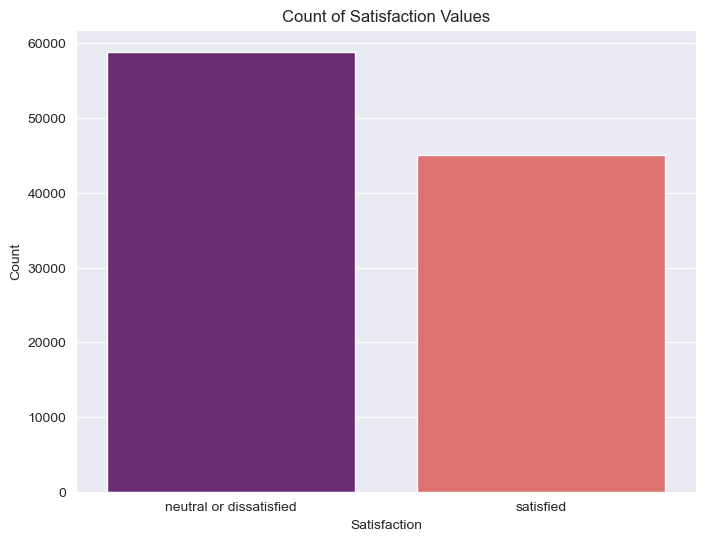

In [299]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='satisfaction',palette='magma')
plt.ylabel('Count')
plt.xlabel('Satisfaction')
plt.title('Count of Satisfaction Values')

#### Investigating the Gender Column

In [300]:
airline['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Count of Gender Values')

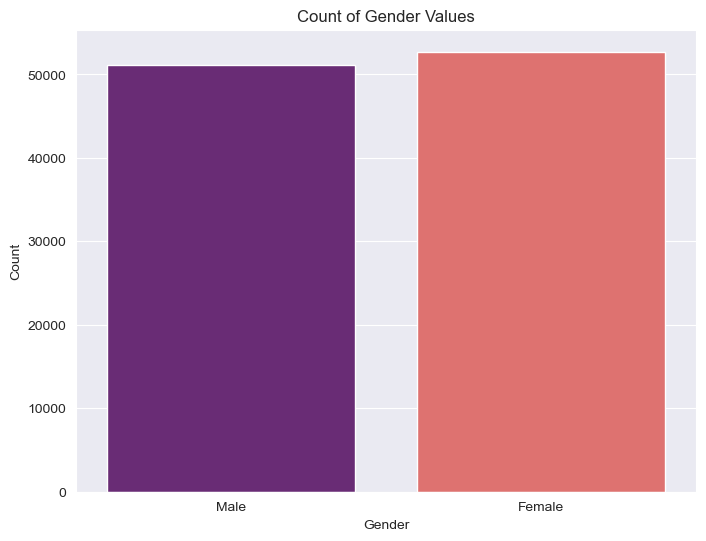

In [301]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Gender',palette='magma')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Count of Gender Values')

Text(0.5, 1.0, 'Satisfaction Distribution By Gender')

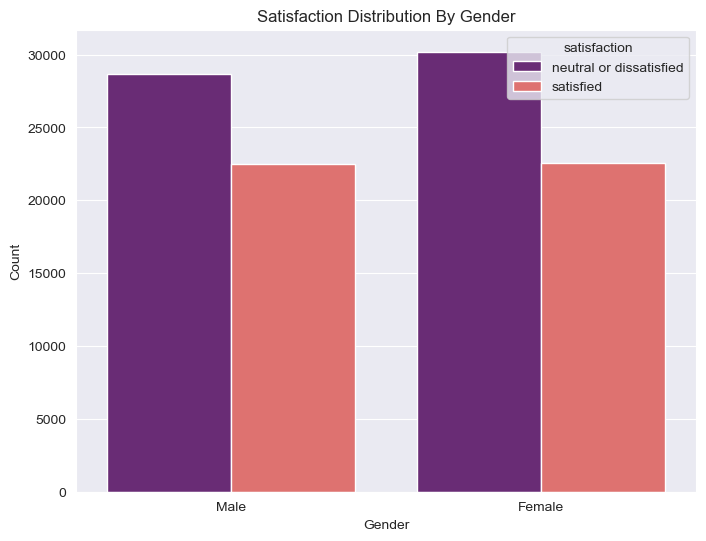

In [302]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(data=airline,x='Gender',hue='satisfaction',palette='magma')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Satisfaction Distribution By Gender')

**The plot shows that both males and females were generally neutral or dissatisfied with the airline**.

#### Investigating the Age Column

C:\Users\justi\AppData\Local\Temp\ipykernel_18916\2354825698.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airline['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

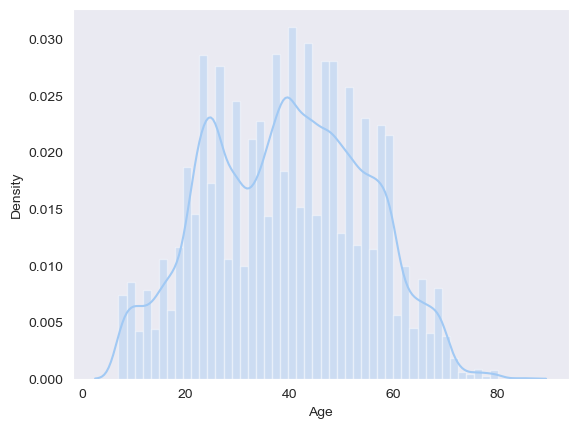

In [303]:
sns.set_style('dark')
sns.distplot(airline['Age'])

Customers were mostly in their **forties** followed by **twenties**.

In [304]:
print(f"Unique ages: {airline['Age'].nunique()}")

Unique ages: 75


75 unique ages were represented in the data.

In [305]:
# helper function to group customers into age categories
def age_category(age):
    if age < 10: return 'Below 10'
    if age >= 10 and age < 20: return 'Teens'
    if age >= 20 and age < 30: return 'Twenties'
    if age >= 30 and age < 40: return 'Thirties'
    if age >= 40 and age < 50: return 'Fourties'
    if age >= 50 and age < 60: return 'Fifties'
    if age >= 60 and age < 70: return 'Sixties'
    if age >= 70 and age < 80: return 'Seventies'
    if age >= 80 and age < 90: return 'Eighties'

In [306]:
airline['Age Category'] = airline['Age'].apply(age_category)

In [307]:
airline['Age Category'].value_counts()

Fourties     23696
Twenties     20914
Thirties     20659
Fifties      19103
Sixties       8346
Teens         7919
Below 10      1894
Seventies     1278
Eighties        95
Name: Age Category, dtype: int64

Text(0.5, 1.0, 'Count of Age Categories')

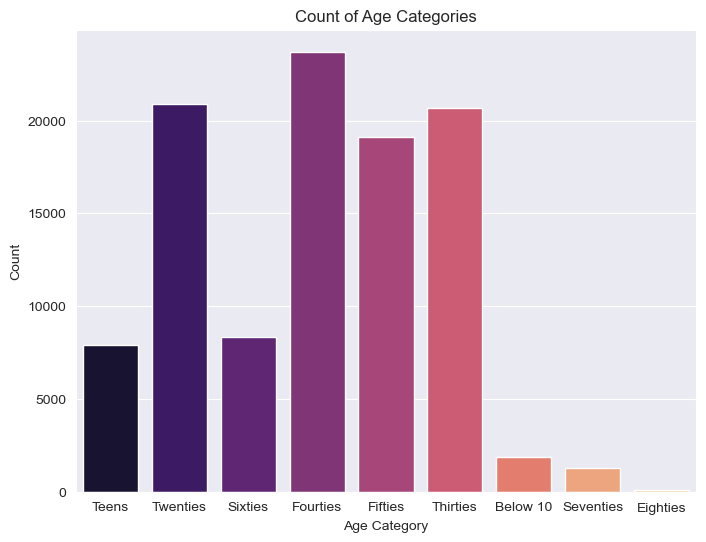

In [308]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Age Category',palette='magma')
plt.ylabel('Count')
plt.title('Count of Age Categories')

The plot therefore confirms the result of the distribution plot of ages in that majority of customers were in their **40s** followed by **20s** then **30s**, **50s**, **60s**, **Teens**, **Children(Below 10)**, **70s** and lastly a few customers were in their **80s**.

Text(0.5, 1.0, 'Count of Satisfaction Values by Age Category')

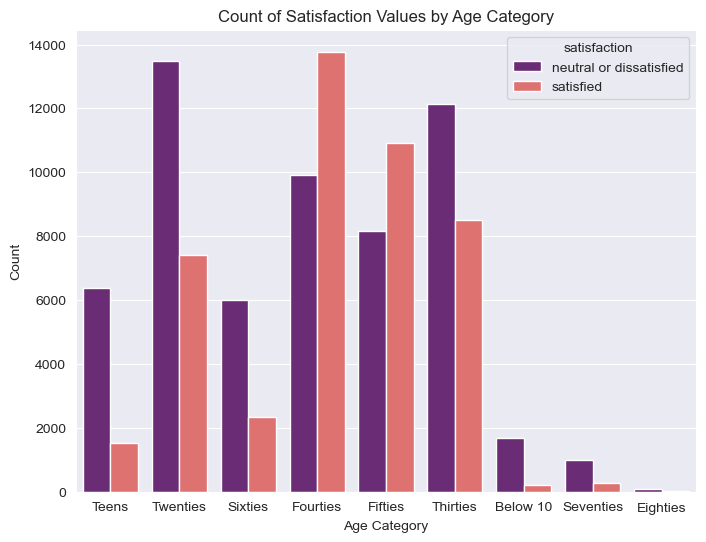

In [309]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Age Category', hue='satisfaction',palette='magma')
plt.ylabel('Count')
plt.title('Count of Satisfaction Values by Age Category')

As we can see, customers in their **40s** and **50s** were generally more satisfied with the airline than customers in other age categories.

Text(0.5, 1.0, 'Distribution Of Genders by Age Category')

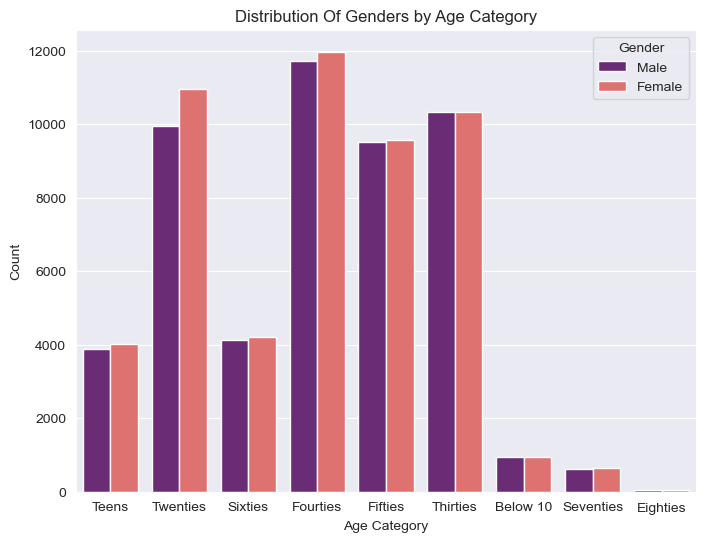

In [310]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Age Category', hue='Gender',palette='magma')
plt.ylabel('Count')
plt.title('Distribution Of Genders by Age Category')

**Females** were slightly more represented in each of the age categories.

#### Investigating Customer Type

In [311]:
print(f"Unique Customer Types: {airline['Customer Type'].nunique()}")
airline['Customer Type'].value_counts()

Unique Customer Types: 2


Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [312]:
airline['Customer Type'] = airline['Customer Type'].replace('disloyal Customer', 'Disloyal Customer')

Text(0.5, 1.0, 'Count of Customer Types')

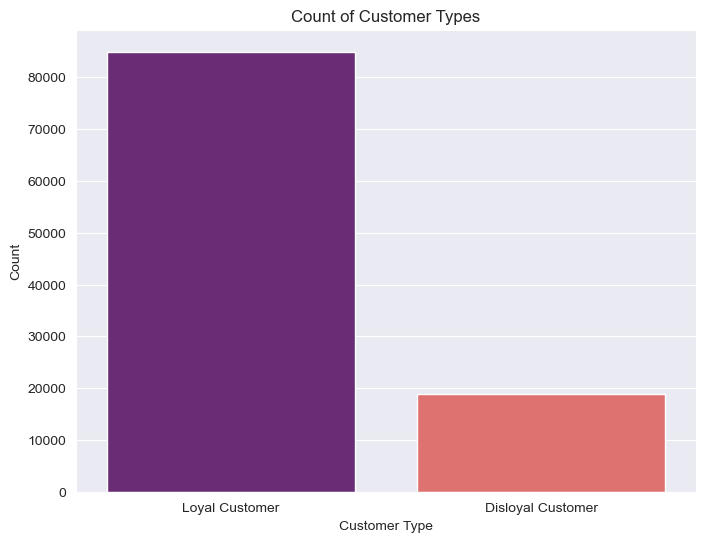

In [313]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Customer Type',palette='magma')
plt.ylabel('Count')
plt.title('Count of Customer Types')

Text(0.5, 1.0, 'Customer Types By Gender')

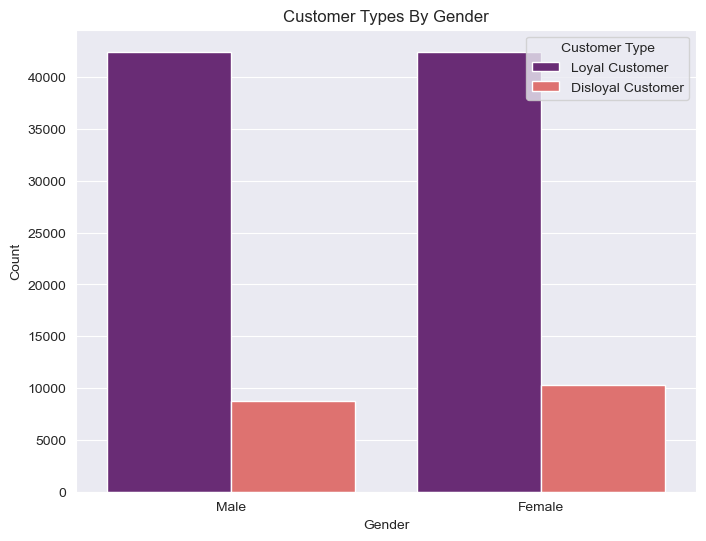

In [314]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Gender',hue='Customer Type',palette='magma')
plt.ylabel('Count')
plt.title('Customer Types By Gender')

Both males and females were loyal customers.

#### Investigating Type Of Travel

In [315]:
airline['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [316]:
airline['Type of Travel'] = airline['Type of Travel'].replace('Business travel','Business Travel')

Text(0.5, 1.0, 'Count of Travel Types')

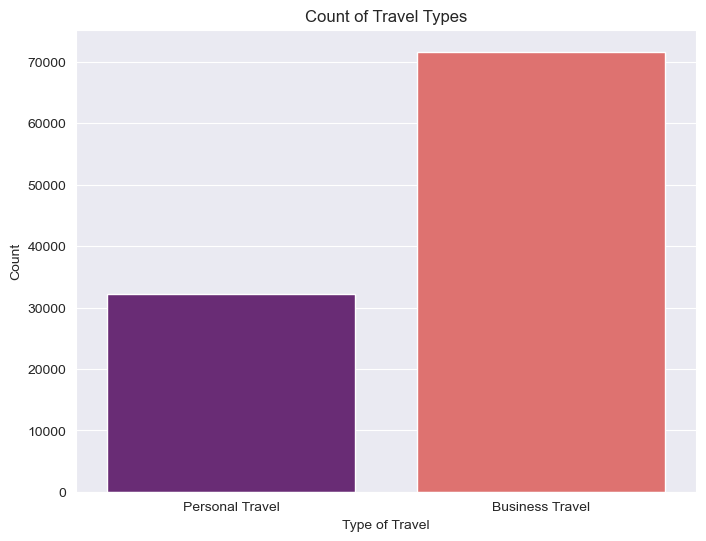

In [317]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Type of Travel',palette='magma')
plt.ylabel('Count')
plt.title('Count of Travel Types')

Text(0.5, 1.0, 'Travel Types By Gender')

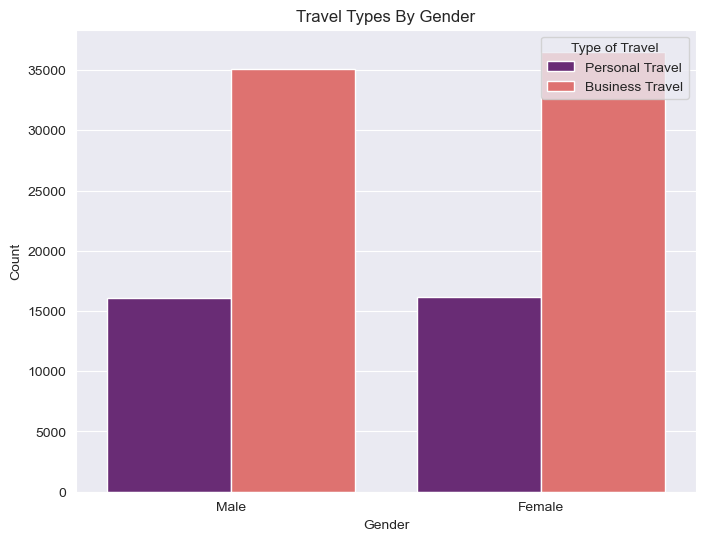

In [318]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Gender',hue='Type of Travel',palette='magma')
plt.ylabel('Count')
plt.title('Travel Types By Gender')

Both males and females travelled mainly for business reasons.

#### Investigating Class 

In [319]:
airline['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

Text(0.5, 1.0, 'Count of Classes')

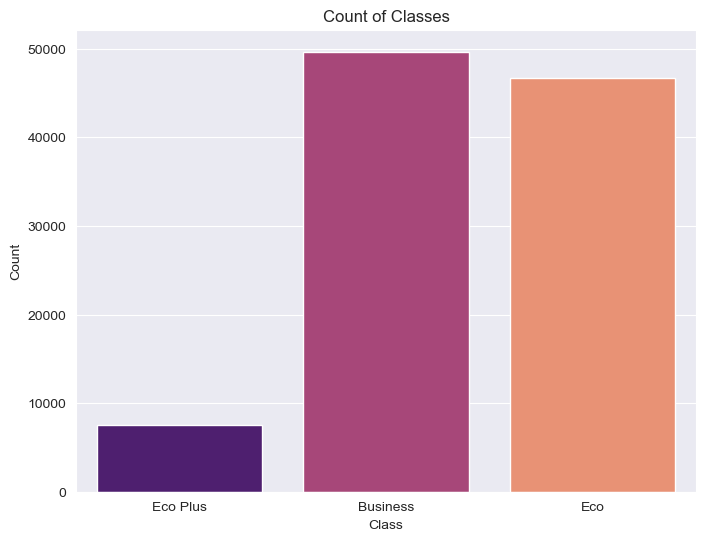

In [320]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Class',palette='magma')
plt.ylabel('Count')
plt.title('Count of Classes')

Text(0.5, 1.0, 'Distribution of Classes By Gender')

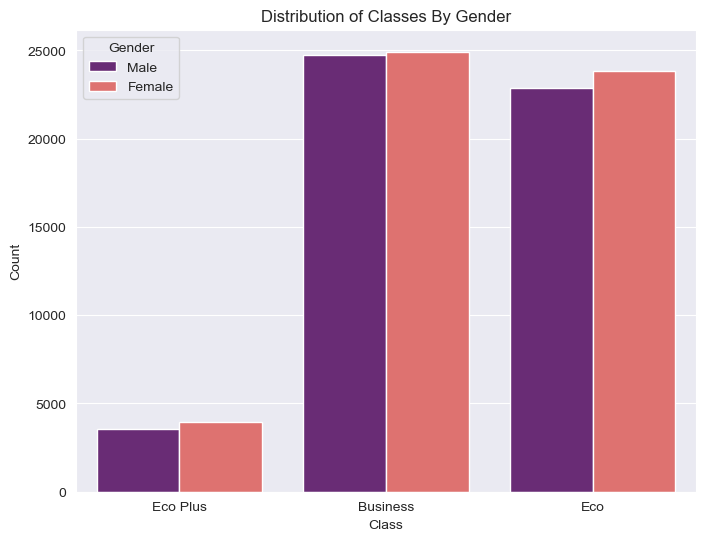

In [321]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(data=airline, x='Class',hue='Gender',palette='magma')
plt.ylabel('Count')
plt.title('Distribution of Classes By Gender')

#### Investigating Flight Distance

In [322]:
airline['Flight Distance'].agg(['mean', max, min])

mean    1189.448375
max     4983.000000
min       31.000000
Name: Flight Distance, dtype: float64

In [323]:
print("Flight Distance Quantiles:")
airline['Flight Distance'].quantile([0,0.25,0.5,0.75,1.0])

Flight Distance Quantiles:


0.00      31.0
0.25     414.0
0.50     843.0
0.75    1743.0
1.00    4983.0
Name: Flight Distance, dtype: float64

<AxesSubplot: >

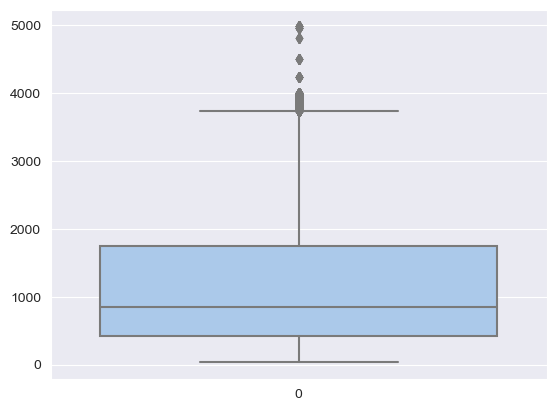

In [324]:
sns.set_style('darkgrid')
sns.boxplot(airline['Flight Distance'])

#### Investigating Departure Delay in Minutes

In [325]:
airline['Departure Delay in Minutes'].agg(['mean', max, min])

mean      14.815618
max     1592.000000
min        0.000000
Name: Departure Delay in Minutes, dtype: float64

In [326]:
print("Departure Delay in Minutes Quantiles:")
airline['Departure Delay in Minutes'].quantile([0,0.25,0.5,0.75,1])

Departure Delay in Minutes Quantiles:


0.00       0.0
0.25       0.0
0.50       0.0
0.75      12.0
1.00    1592.0
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot: >

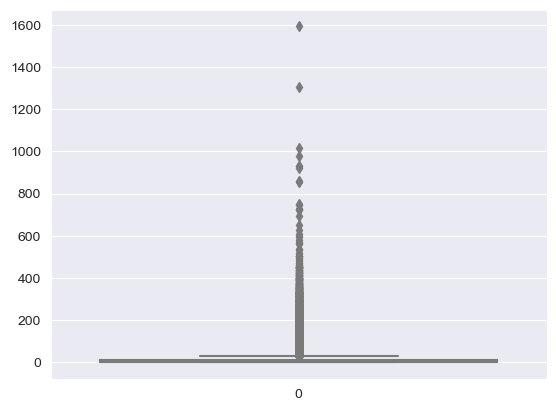

In [327]:
sns.set_style('darkgrid')
sns.boxplot(airline['Departure Delay in Minutes'])

#### Investigating Arrival Delay In Minutes

In [328]:
airline['Arrival Delay in Minutes'].agg(['mean', max, min])

mean      15.178678
max     1584.000000
min        0.000000
Name: Arrival Delay in Minutes, dtype: float64

In [329]:
print("Arrival Delay In Minutes Quantiles")
airline['Arrival Delay in Minutes'].quantile([0,0.25,0.5,0.75,1])

Arrival Delay In Minutes Quantiles


0.00       0.0
0.25       0.0
0.50       0.0
0.75      13.0
1.00    1584.0
Name: Arrival Delay in Minutes, dtype: float64

<AxesSubplot: >

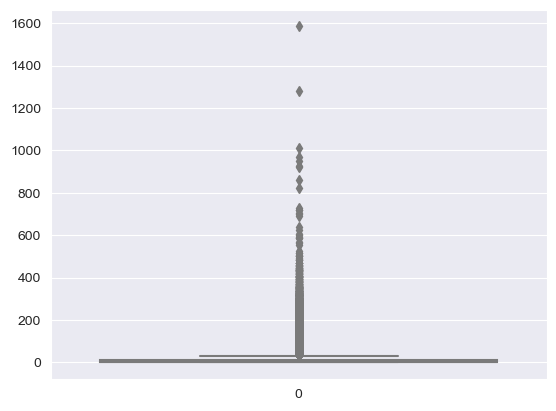

In [330]:
sns.set_style('darkgrid')
sns.boxplot(airline['Arrival Delay in Minutes'])

In investigating the various features which have a rating of 0-5 where 0 represented **not applicable**, 1 being the **lowest rated** and 5 being the **highest rated**, I decided to analyze these features as ratings 1-3 being **dissatisfied** and ratings 4 and 5 being **satisfied**. I made this decision based on the values of the target variable, **satisfaction**, which considers the value neutral or dissatisfied as being the same. 


#### Helper Functions

In [331]:
# helper function to create barplots with satisfaction
def create_bar_plot(df,column,title):
    plt.figure(figsize=(8, 6))
    sns.set_style('darkgrid')
    sns.countplot(data=df, x=column, hue='satisfaction',palette='magma')
    plt.ylabel('Count')
    plt.title(f"Count Of {title} Ratings By Satisfaction")

In [332]:
# helper function to calculate the satisfaction percentages
def calculate_satisfaction_percentage(dataframe, column):
    # Filter the dataframe based on the given column
    column_data = dataframe[column]
    
    # Calculate the percentage of data with values 4 or 5
    satisfied_count = column_data[(column_data == 4) | (column_data == 5)].count()
    satisfied_percentage = (satisfied_count / len(column_data)) * 100
    
    # Calculate the percentage of data with values less than 4 but greater than 0
    dissatisfied_count = column_data[(column_data > 0) & (column_data < 4)].count()
    dissatisfied_percentage = (dissatisfied_count / len(column_data)) * 100
    
    # Calculate the percentage of data with a value of 0 
    non_applicable_count = column_data[column_data == 0].count()
    non_applicable_percentage = (non_applicable_count / len(column_data)) * 100
    
    return satisfied_percentage, dissatisfied_percentage, non_applicable_percentage


In [333]:
# helper function to create piecharts showing percentages of satisfaction
def create_chart(satisfied_percentage, dissatisfied_percentage, na_percentage, title):
    # Create a dataframe with the percentages

    if na_percentage < 1:
        data = pd.DataFrame({'Percentage': [satisfied_percentage, dissatisfied_percentage]},
                            index = ['Satisfied','Dissatisfied'])
    else:
        data = pd.DataFrame({'Percentage': [satisfied_percentage, dissatisfied_percentage, na_percentage]},
                        index=['Satisfied', 'Dissatisfied', 'NA'])

    # Plot the pie chart
    plt.figure(figsize=(8, 6))
    sns.set_palette('pastel')
    sns.set_style('darkgrid')
    plt.title(f'Satisfaction Percentage of {title}')
    plt.pie(data['Percentage'], labels=data.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()

#### Investigating Inflight Wifi Service

In [334]:
airline['Inflight wifi service'].value_counts()

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64

As we can see, the top ratings for Inflight Wifi Service were 3 and 2 meaning most passengers were **dissatisfied** with this particular service.

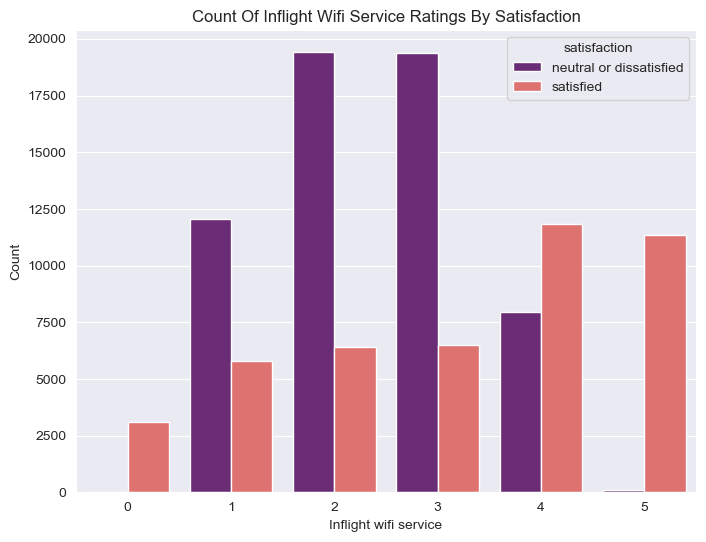

In [335]:
create_bar_plot(airline,'Inflight wifi service','Inflight Wifi Service')

Flights which had no wifi service (0-not applicable) were all rated as **satisfied** by passengers and flights that scored ratings 4 and 5 for their wifi service had the same outcome i.e. passengers were satisfied with the airline. Flights which had ratings of 1,2 and 3 for the wifi service saw most of the passengers being **dissatisfied** with the flight. This may suggest that **the better the Inflight Wifi Service of the flight, the likely it is that passengers would be satisfied with the flight**.

In [336]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Inflight wifi service')

In [337]:
print(f"Percentage of Satisfaction with Inflight Wifi Service: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Inflight Wifi Service: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Inflight Wifi Service: {np.round(na_percentage)}")

Percentage of Satisfaction with Inflight Wifi Service: 30.0
Percentage of Dissatisfaction with Inflight Wifi Service: 67.0
Percentage of Airlines without Inflight Wifi Service: 3.0


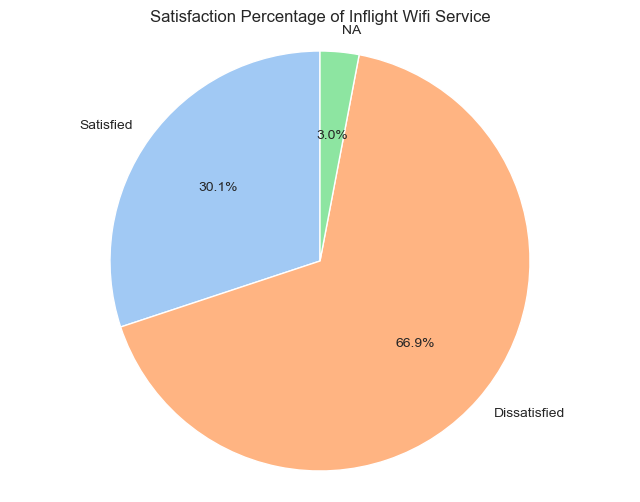

In [338]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Inflight Wifi Service')

From this chart, we see that:
- **66.9%** of passengers were dissatisfied with the Inflight Wifi Service.
- **30.1%** of passengers were satisfied with the Inflight Wifi Service.
- **3%** of flights had no Inflight Wifi Service.

#### Investigating Departure/Arrival Time Convenient

In [339]:
airline['Departure/Arrival time convenient'].value_counts()

4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64

The top ratings were 4 and 5.

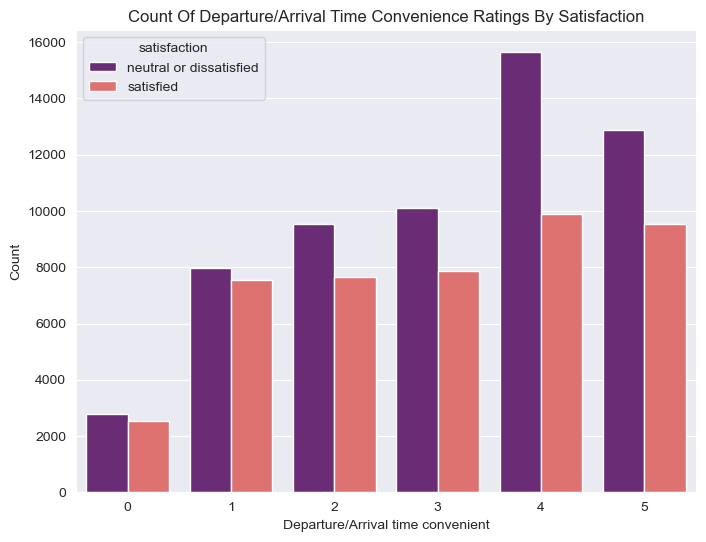

In [340]:
create_bar_plot(airline,'Departure/Arrival time convenient','Departure/Arrival Time Convenience')

As we can see, whether the rating was 1(the lowest), 5(the highest) or 0(not applicable), the majority of passengers were **dissatisfied** with the flight. This can suggest that Departure/Arrival Time Convenience has no significant impact on whether a customer is **satisfied** or **dissatisfied** with an airline.

In [341]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Departure/Arrival time convenient')

In [342]:
print(f"Percentage of Satisfaction with Departure/Arrival Time Convenience: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Departure/Arrival Time Convenience: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Departure/Arrival Time Convenience: {np.round(na_percentage)}")

Percentage of Satisfaction with Departure/Arrival Time Convenience: 46.0
Percentage of Dissatisfaction with Departure/Arrival Time Convenience: 49.0
Percentage of Airlines without Departure/Arrival Time Convenience: 5.0


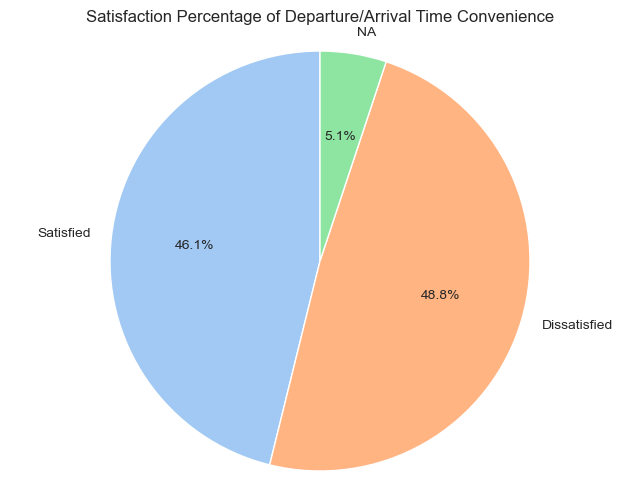

In [343]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Departure/Arrival Time Convenience')

From the chart, we can see that:
- **48.8%** of passengers were dissatisifed with the Departure/Arrival Time Convenience.
- **46.1%** of passengers were satisfied with the Departure/Arrival Time Convenience.
- **5.1%** of flights had no Departure/Arrival Time Convenience.

#### Investigating Ease Of Online Booking

In [344]:
airline['Ease of Online booking'].value_counts()

3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64

The top two ratings of Ease Of Online Booking were 2 and 3.

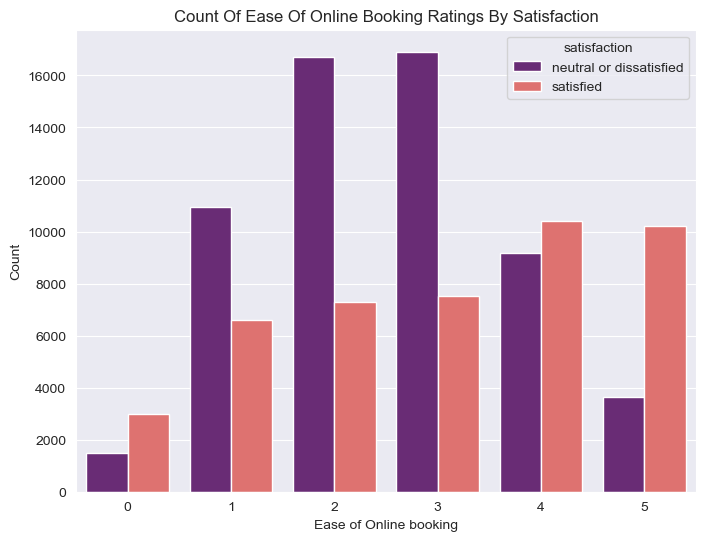

In [345]:
create_bar_plot(airline,'Ease of Online booking','Ease Of Online Booking')

Ratings of 4 and 5 resulted saw more passengers being **satisfied** with the airline and where it was not applicable (rating of 0), passengers were slighlty more **satisfied** with the airline. Flights which had ratings of 1,2 and 3 had the majority of passengers being **dissatisfied** with the airline. Again, this can suggest that **the easier it is to book a flight online, the more satisfied passengers would be**.

In [346]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Ease of Online booking')

In [347]:
print(f"Percentage of Satisfaction with Ease Of Online Booking: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Ease Of Online Booking: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Ease Of Online Booking: {np.round(na_percentage)}")

Percentage of Satisfaction with Ease Of Online Booking: 32.0
Percentage of Dissatisfaction with Ease Of Online Booking: 64.0
Percentage of Airlines without Ease Of Online Booking: 4.0


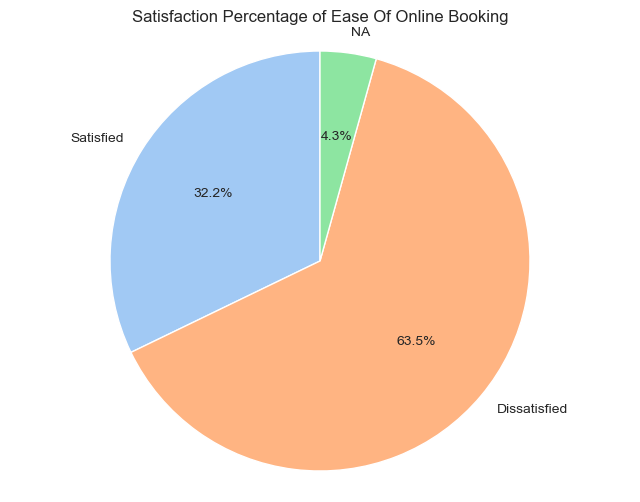

In [348]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Ease Of Online Booking')

From this chart, we see that:
- **63.5%** of passengers were dissatisfied with the Ease Of Online Booking.
- **32.2%** of passengers were satisfied with the Ease Of Online Booking.
- **4.3%** of flights were not applicable for Online Booking.

#### Investigating Gate Location

In [349]:
airline['Gate location'].value_counts()

3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64

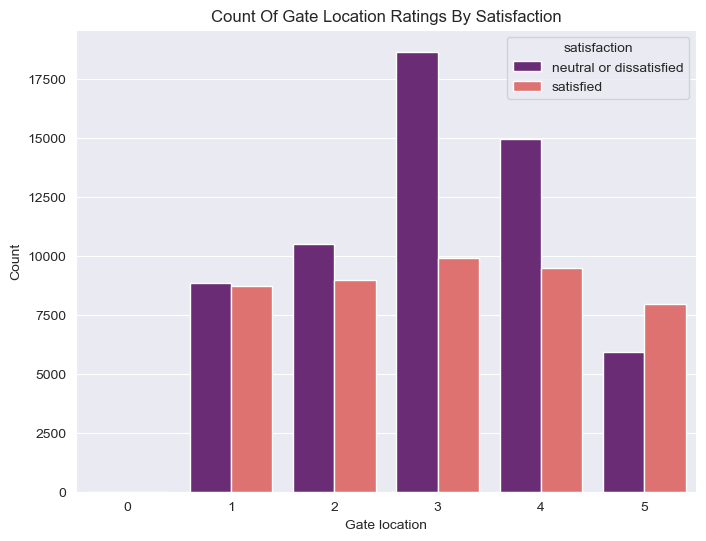

In [350]:
create_bar_plot(airline,'Gate location','Gate Location')

Ratings 1,2,3 and 4 for the Gate Location all had **neutral or dissatisfied** for the airline rating. Flights that were rated 5 saw most of the passengers rated the airline as **satisfied** but there isn't much evidence to suggest that Gate Location has an effect on the overall rating of the airline.

In [351]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Gate location')

In [352]:
print(f"Percentage of Satisfaction with Gate Location: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Gate Location: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Gate Location: {np.round(na_percentage)}")

Percentage of Satisfaction with Gate Location: 37.0
Percentage of Dissatisfaction with Gate Location: 63.0
Percentage of Airlines without Gate Location: 0.0


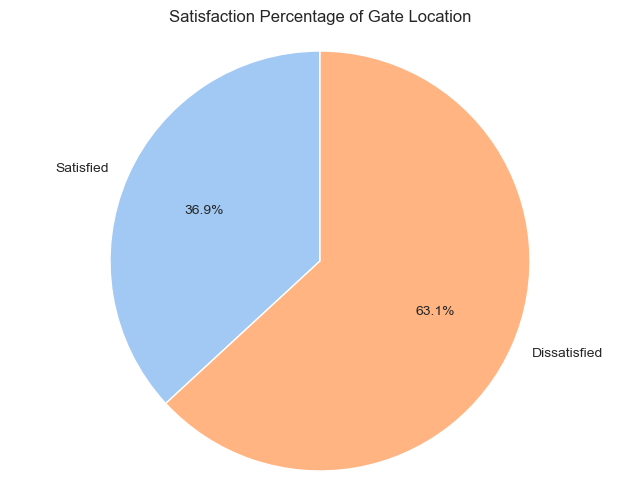

In [353]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Gate Location')

Based on the above chart, we see that:
- **63.1%** of passengers were dissatisfied with the Gate Location.
- **36.9%** of passengers were satisfied with the Gate Location.

#### Investigating Food & Drink

In [354]:
airline['Food and drink'].value_counts()

4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64

The top ratings for the Food & Drink were 4 and 5.

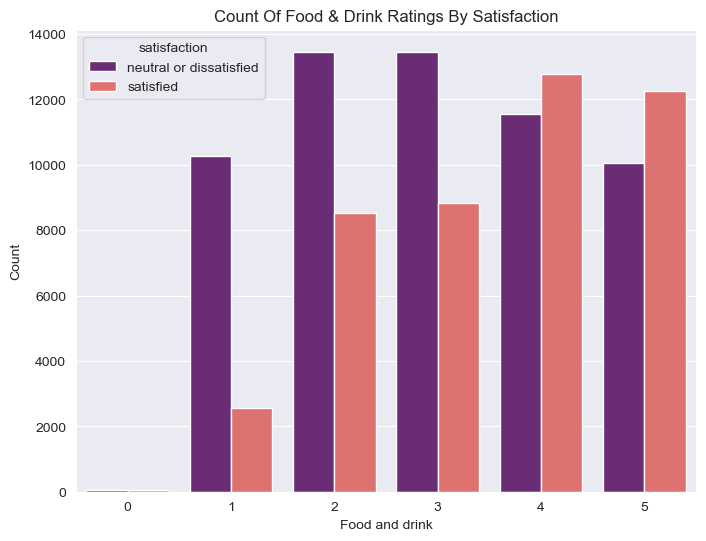

In [355]:
create_bar_plot(airline,'Food and drink','Food & Drink')

Rating 1,2 and 3 for Food & Drink had the majority of passengers being **dissatisfied** with the flight whereas the opposite was seen for passengers that rated the Food & Drink as 4 and 5 but the difference was very small.

In [356]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Food and drink')

In [357]:
print(f"Percentage of Satisfaction with Food & Drink: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Food & Drink: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Food & Drink: {np.round(na_percentage)}")

Percentage of Satisfaction with Food & Drink: 45.0
Percentage of Dissatisfaction with Food & Drink: 55.0
Percentage of Airlines without Food & Drink: 0.0


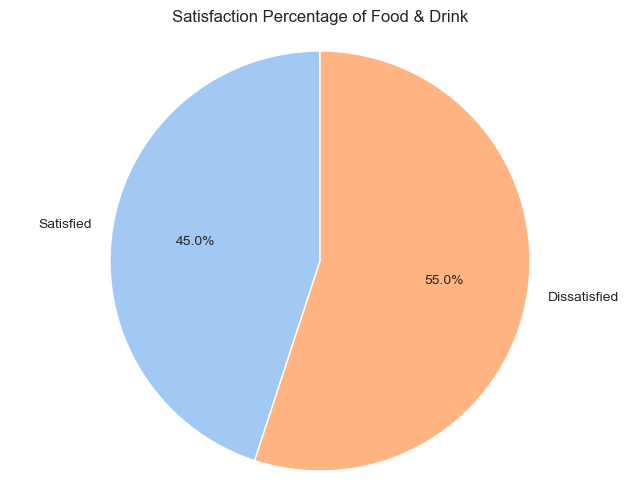

In [358]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Food & Drink')

Based on the cart, we see that:
- **45%** of passengers were satisfied with the Food & Drink.
- **55%** of passengers were dissatisifed with the Food & Drink.

#### Investigating Online Boarding

In [359]:
airline['Online boarding'].value_counts()

4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64

The highest ratings for Online Boarding were 4 and 3.

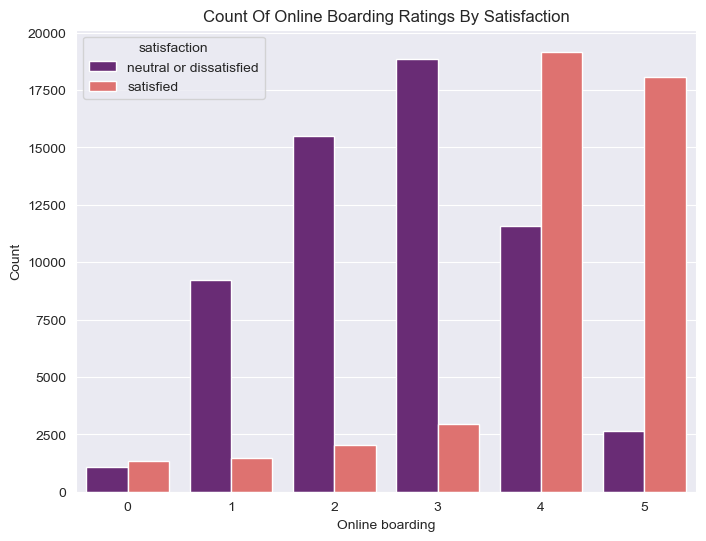

In [360]:
create_bar_plot(airline,'Online boarding','Online Boarding')

We can see that when passengers rated the Online Boarding as low ratings i.e. 1-3, passengers mostly rated the airline as **neutral or dissatisfied** whereas when ratings were 4 and 5 i.e. high ratings, passengers were **satisfied**.

In [361]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Online boarding')

In [362]:
print(f"Percentage of Satisfaction with Online Boarding: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Online Boarding: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Online Boarding: {np.round(na_percentage)}")

Percentage of Satisfaction with Online Boarding: 50.0
Percentage of Dissatisfaction with Online Boarding: 48.0
Percentage of Airlines without Online Boarding: 2.0


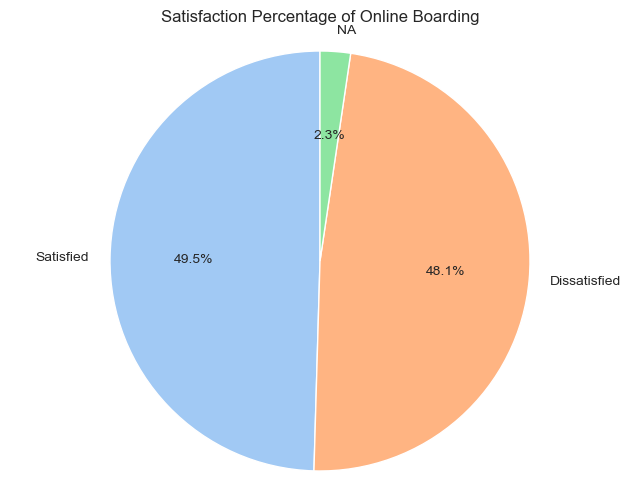

In [363]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Online Boarding')

Based on the chart, we see that:
- **49.5%** of passengers were satisfied with the Online Boarding.
- **48.1%** of passengers were dissatisfied with the Online Boarding.
- **2.3%** of flights had no Online Boarding.

#### Investigating Seat Comfort

In [364]:
airline['Seat comfort'].value_counts()

4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64

Top ratings for Seat Comfort were 4 and 5.

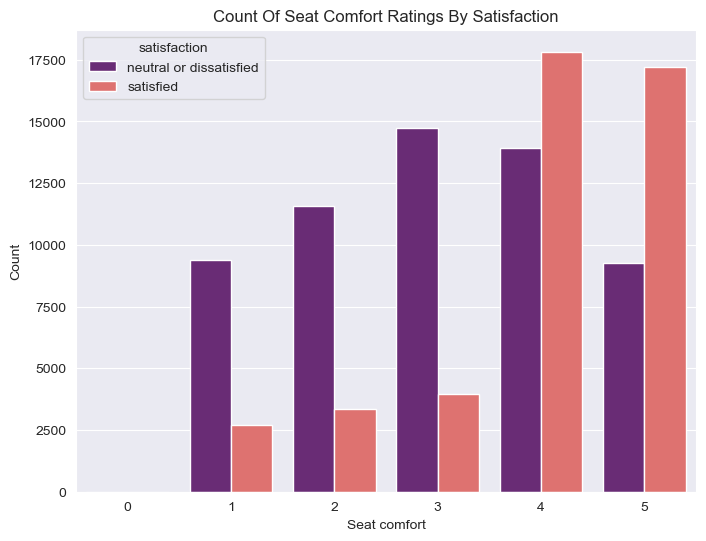

In [365]:
create_bar_plot(airline,'Seat comfort','Seat Comfort')

When ratings were low for seat comfort (1-3), the majority of the flights were **neutral or dissatisfied**. When ratings were high (4-5), passengers were **satisfied** with the airline but there was a greater difference between both in each of the cases.

In [366]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Seat comfort')

In [367]:
print(f"Percentage of Satisfaction with Seat Comfort: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Seat Comfort: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Seat Comfort: {np.round(na_percentage)}")

Percentage of Satisfaction with Seat Comfort: 56.0
Percentage of Dissatisfaction with Seat Comfort: 44.0
Percentage of Airlines without Seat Comfort: 0.0


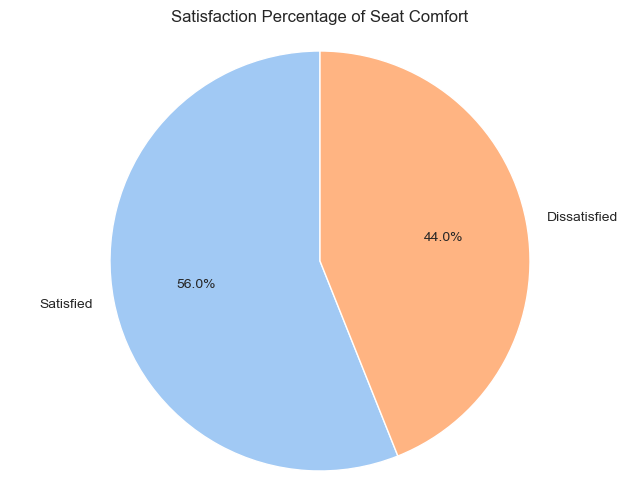

In [368]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Seat Comfort')

From the chart, we see that:
- **56%** of passengers were satisfied with the seat comfort.
- **44%** of passengers were dissatisfied with the seat comfort.

#### Investigating Inflight Entertainment

In [369]:
airline['Inflight entertainment'].value_counts()

4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight entertainment, dtype: int64

Ratings for Inflight Entertainment were very high (4-5).

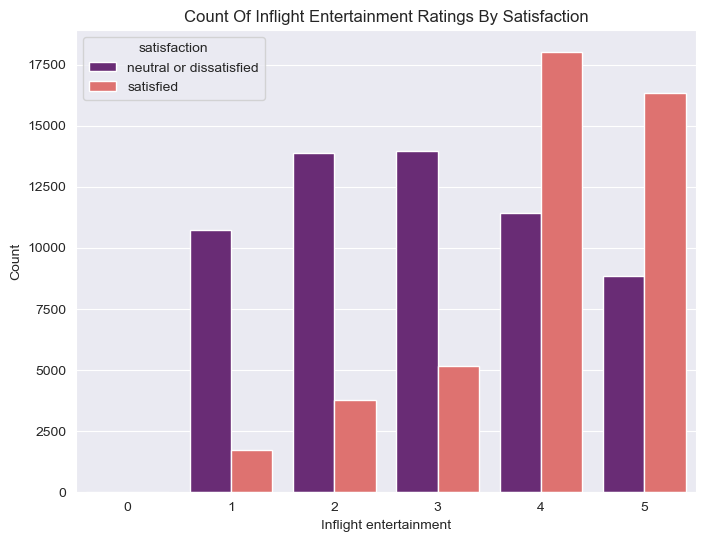

In [370]:
create_bar_plot(airline,'Inflight entertainment','Inflight Entertainment')

When ratings for Inflight Entertainment were high (4-5), passengers were generally **satisfied** with the airline as opposed to when ratings were low. This can suggest that **the better the online entertainment, the more likely a passenger would be satisfied with the airline**. 

In [371]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Inflight entertainment')

In [372]:
print(f"Percentage of Satisfaction with Inflight Entertainment: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Inflight Entertainment: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Inflight Entertainment: {np.round(na_percentage)}")

Percentage of Satisfaction with Inflight Entertainment: 53.0
Percentage of Dissatisfaction with Inflight Entertainment: 47.0
Percentage of Airlines without Inflight Entertainment: 0.0


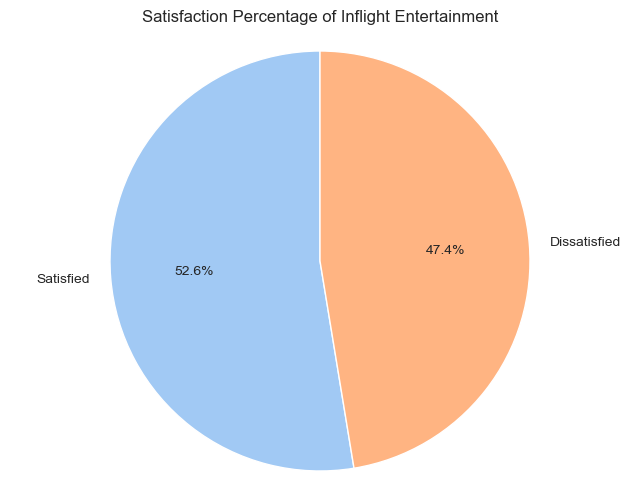

In [373]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Inflight Entertainment')

Based on the chart:
- **52.6%** of passengers were satisfied with the Online Entertainment.
- **47.4%** of passengers were dissatisfied with the Online Entertainment.

#### Investigating On-Board Service

In [374]:
airline['On-board service'].value_counts()

4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board service, dtype: int64

The top ratings for On-Board Service were high (4-5).

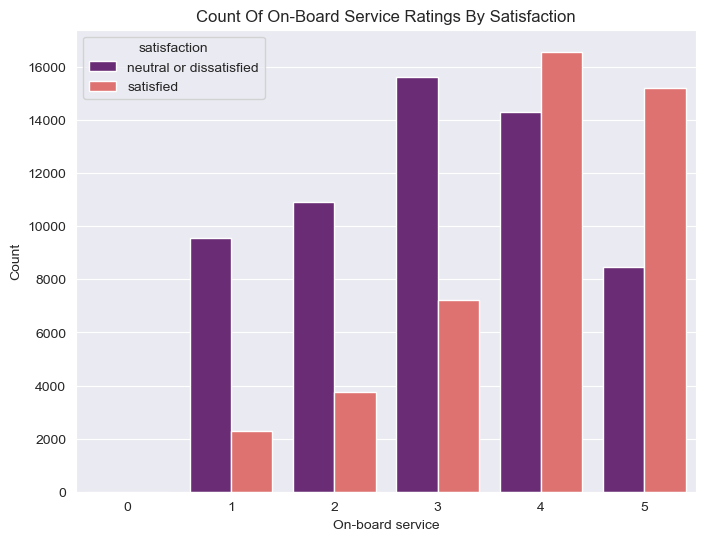

In [375]:
create_bar_plot(airline,'On-board service','On-Board Service')

As we can see, when ratings were low (1-3), passengers were generally **neutral or dissatisfied** with the On-Board Service as opposed to when the ratings were high. However, the bars for each of the rating show that there were far more passengers dissatisfied with the airline overall despite the rating being high since the difference between the two were smaller. This can suggest there On-Board Service does not significantly impact the overall satisfaction.

In [376]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'On-board service')

In [377]:
print(f"Percentage of Satisfaction with On-Board Service: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with On-Board Service: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without On-Board Service: {np.round(na_percentage)}")

Percentage of Satisfaction with On-Board Service: 52.0
Percentage of Dissatisfaction with On-Board Service: 48.0
Percentage of Airlines without On-Board Service: 0.0


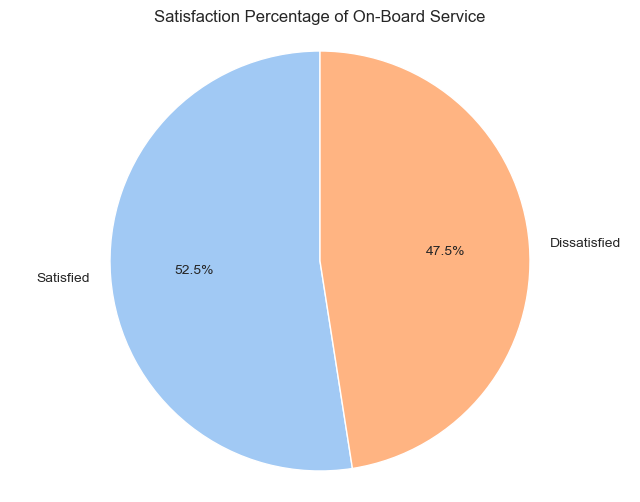

In [378]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'On-Board Service')

Based on the chart:
- **52.5%** of passengers were satisfied with the On-Board Service.
- **47.5%** of passengers were dissatisfied with the On-Board Service.

#### Investigating Leg Room Service

In [379]:
airline['Leg room service'].value_counts()

4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg room service, dtype: int64

The top ratings for Leg Room Service were high (4-5).

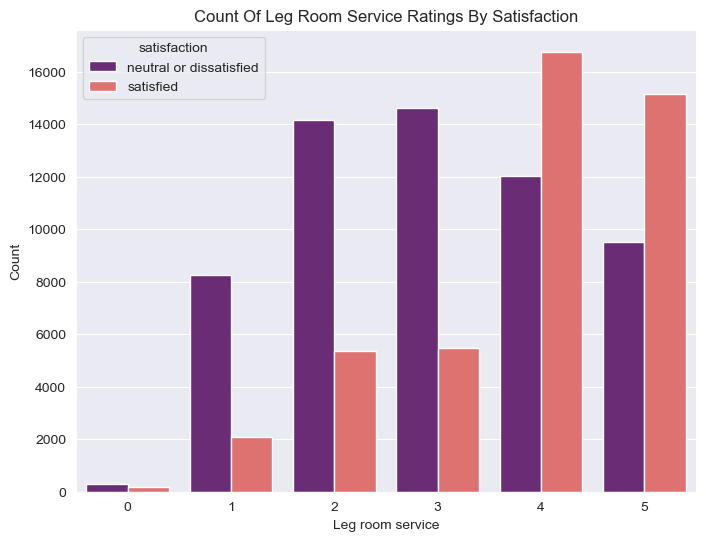

In [380]:
create_bar_plot(airline,'Leg room service','Leg Room Service')

We see that when ratings for Leg Room Service were low (1-3), passengers were generally **neutral or dissatisfied** with the airline as opposed to when ratings were high. 

In [381]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Leg room service')

In [382]:
print(f"Percentage of Satisfaction with Leg Room Service: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Leg Room Service: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Leg Room Service: {np.round(na_percentage)}")

Percentage of Satisfaction with Leg Room Service: 51.0
Percentage of Dissatisfaction with Leg Room Service: 48.0
Percentage of Airlines without Leg Room Service: 0.0


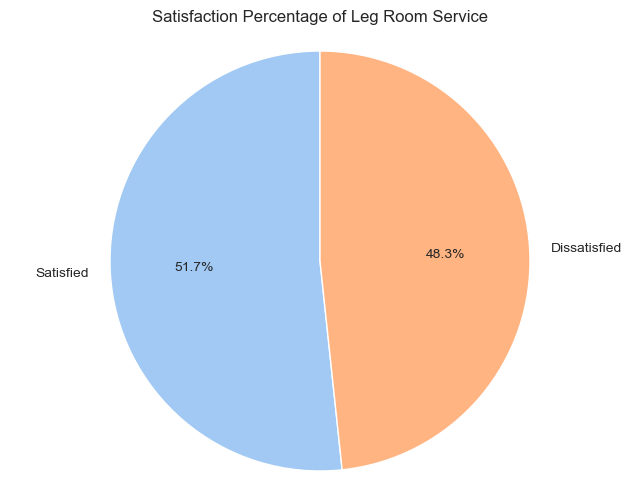

In [383]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Leg Room Service')

Based on the chart:
- **51.7%** of passengers were satisfied with the Leg Room Service.
- **48.3%** of passengers were dissatisfied with the Leg Room Service.

#### Investigating Baggage Handling

In [384]:
airline['Baggage handling'].value_counts()

4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64

The top ratings for Baggage Handling were 4 and 5.

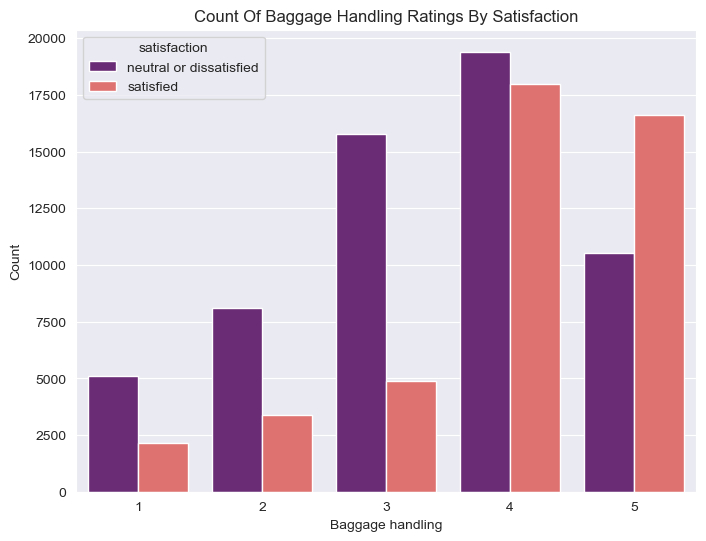

In [385]:
create_bar_plot(airline,'Baggage handling','Baggage Handling')

For ratings 1-4 of Baggage Handling, passengers were generally **neutral or dissatisfied** with the airline as opposed to when the rating was 5. There were higher ratings overall which suggests that passengers were satisfied with the Baggage Handling but overall passengers were not satisfied with the airline which can suggests that there is no significant relationship between the Baggage Handling and the airline satisfaction.

In [386]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Baggage handling')

In [387]:
print(f"Percentage of Satisfaction with Baggage Handling: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Baggage Handling: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Baggage Handling: {np.round(na_percentage)}")

Percentage of Satisfaction with Baggage Handling: 62.0
Percentage of Dissatisfaction with Baggage Handling: 38.0
Percentage of Airlines without Baggage Handling: 0.0


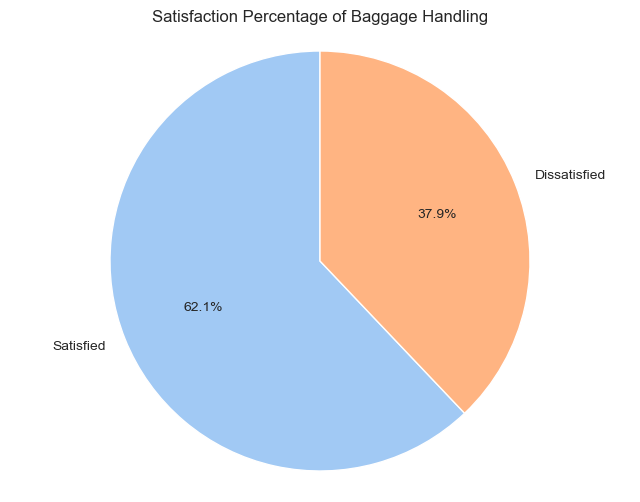

In [388]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Baggage Handling')

Based on the chart:
- **62.1%** of passengers were satisfied with the Baggage Handling.
- **37.9%** of passengers were dissatisfied with the Baggage Handling.

#### Investigating Check-In Service

In [389]:
airline['Checkin service'].value_counts()

4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64

The top ratings for the Check-In Service were 4 and 3.

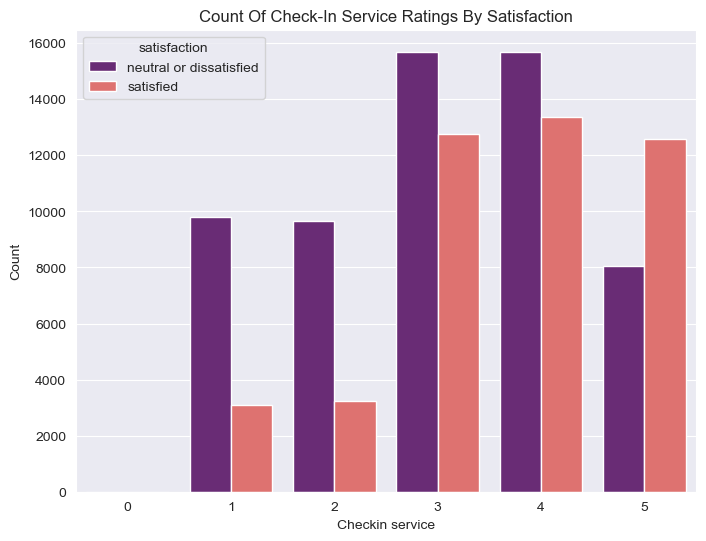

In [390]:
create_bar_plot(airline,'Checkin service','Check-In Service')

When the Check-In Service was rated 1-4, passengers were generally **neutral or dissatisfied** with the airline but when the rating was highest (5), passengers were **satisfied** with the airline.

In [391]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Checkin service')

In [392]:
print(f"Percentage of Satisfaction with Check-In Service: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Check-In Service: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Check-In Service: {np.round(na_percentage)}")

Percentage of Satisfaction with Check-In Service: 48.0
Percentage of Dissatisfaction with Check-In Service: 52.0
Percentage of Airlines without Check-In Service: 0.0


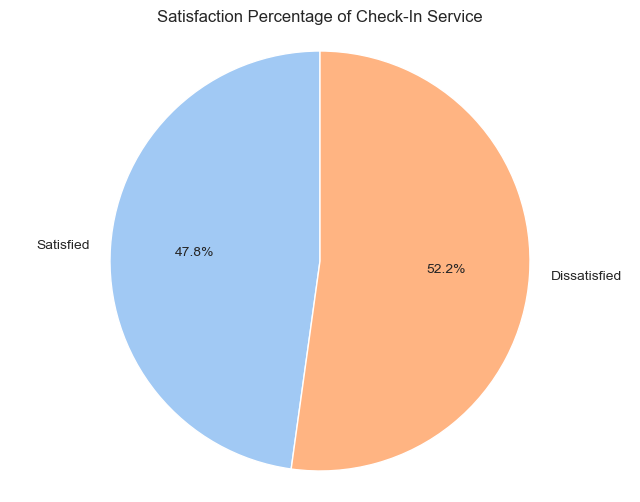

In [393]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Check-In Service')

Based on the chart, we see that:
- **47.8%** of passengers were satisfied with the Check-In Service.
- **52.2%** of passengers were dissatisfied with the Check-In Service.

#### Investigating Inflight Service

In [394]:
airline['Inflight service'].value_counts()

4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64

The top ratings were high (4 & 5).

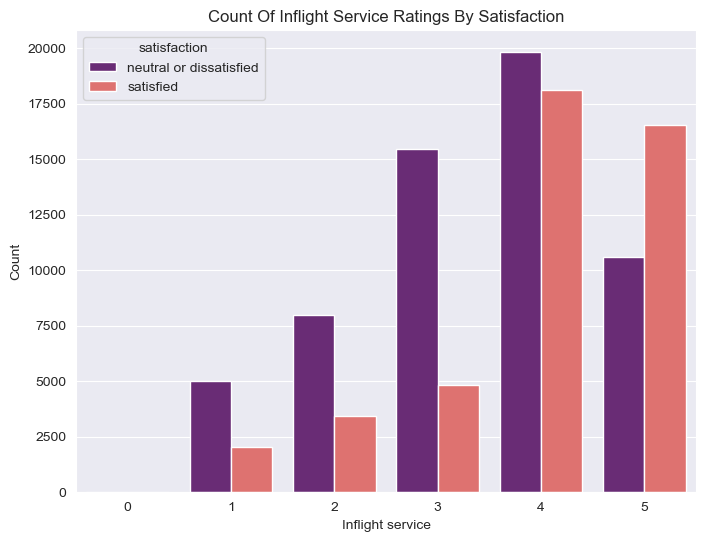

In [395]:
create_bar_plot(airline,'Inflight service','Inflight Service')

For ratings 1-4, passengers rated the airline as **neutral or dissatisfied** but more passengers were **satisfied** when the rating was 5. This can suggest that the Inflight Service may not have a significant impact on a passenger's overall satisfaction of the airline.

In [396]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Inflight service')

In [397]:
print(f"Percentage of Satisfaction with Inflight Service: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Inflight Service: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Inflight Service: {np.round(na_percentage)}")

Percentage of Satisfaction with Inflight Service: 63.0
Percentage of Dissatisfaction with Inflight Service: 37.0
Percentage of Airlines without Inflight Service: 0.0


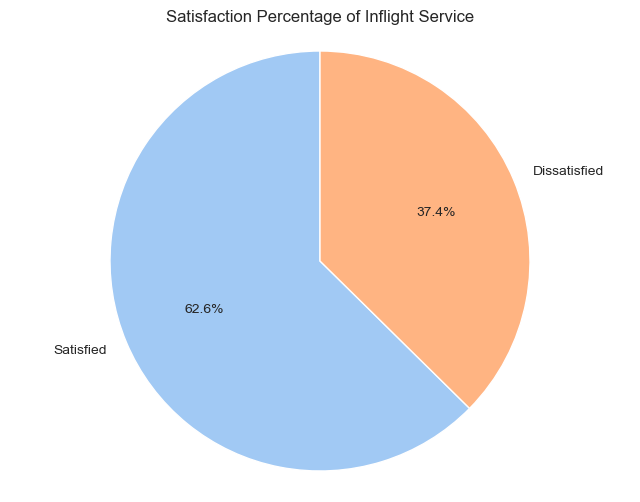

In [398]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Inflight Service')

Based on the chart:
- **62.6%** of passengers were satisfied with the Inflight Service.
- **37.4%** of passengers were dissatisifed with the Inflight Service.

#### Investigating Cleanliness

In [399]:
airline['Cleanliness'].value_counts()

4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64

Top ratings for Cleanlines were 4 and 3.

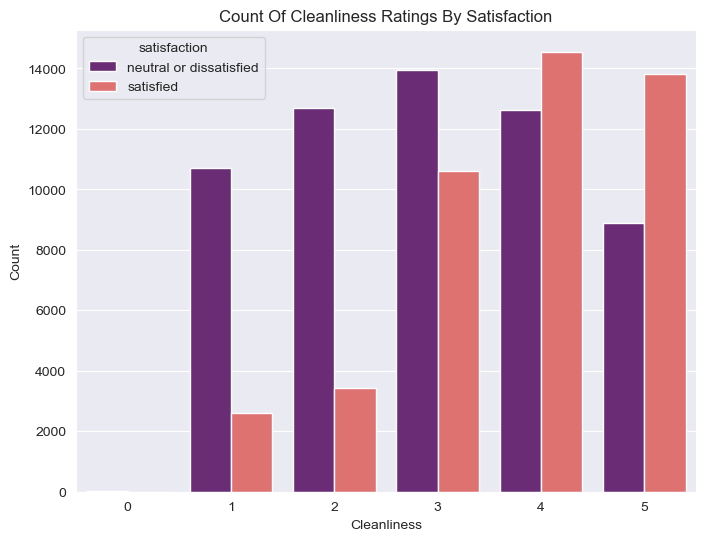

In [400]:
create_bar_plot(airline,'Cleanliness','Cleanliness')

Majority of the passengers were **neutral or dissatisfied** with the airline when cleanliness was rated low (1-3). Passengers were **satisfied** with the airline when cleanliness was rated high but the difference between passengers being dissatisfied and satisfied when the rating was high was smaller than when passengers rated the cleanliness low.

In [401]:
satisfied_percentage, dissatisfied_percentage, na_percentage = calculate_satisfaction_percentage(airline,'Cleanliness')

In [402]:
print(f"Percentage of Satisfaction with Cleanliness: {np.round(satisfied_percentage)}")
print(f"Percentage of Dissatisfaction with Cleanliness: {np.round(dissatisfied_percentage)}")
print(f"Percentage of Airlines without Cleanliness: {np.round(na_percentage)}")

Percentage of Satisfaction with Cleanliness: 48.0
Percentage of Dissatisfaction with Cleanliness: 52.0
Percentage of Airlines without Cleanliness: 0.0


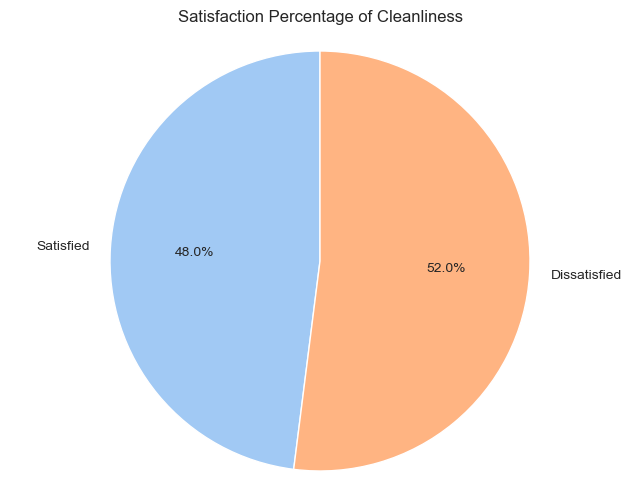

In [403]:
create_chart(satisfied_percentage,dissatisfied_percentage,na_percentage,'Cleanliness')

We can see that:
- **48%** of passengers were satisfied with the Cleanliness.
- **52%** of passengers were dissatisfied with the Cleanliness.

### Transforming Data

In [404]:
airline_copy = airline.copy() # creating a copy of the airline df

In [405]:
airline_copy.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Category
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,Teens
1,1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,Twenties
2,2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,Twenties
3,3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,Twenties
4,4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,Sixties


#### Encoding Categorical Features

In [406]:
# encoding the gender column
encoded_airline = pd.get_dummies(airline_copy, columns=["Gender"], drop_first=True)

One of the gender values was dropped for the purpose of **avoiding multicollinearity**. In this case if for example we created a new encoded column called 'Male' where 1 indicates that a person is male and 0 indicates otherwise, then where the values of Male = 0 would also mean that the person was a female. (based on the two values in the Gender column: Male and Female). 

In [407]:
# encoding the customer type column
encoded_airline = pd.get_dummies(encoded_airline, columns=['Customer Type'], drop_first=True)

The same was done for the Customer Type column. If Loyal Customer = 0 then this would indicate that the person was a Disloyal Customer.

In [408]:
# encoding the type of travel column
encoded_airline = pd.get_dummies(encoded_airline, columns=['Type of Travel'], drop_first=True)

The same was done for the Type Of Travel column. If Business Travel = 0 then this would indicate that the person travelled for Personal Travel.

In [409]:
# encoding the class column
encoded_airline = pd.get_dummies(encoded_airline, columns=['Class'])

In [410]:
# replacing the target column values with binary values 1 or 0
encoded_airline["satisfaction"] = encoded_airline["satisfaction"].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

#### Removing Columns 

In [411]:
encoded_airline.drop(columns=['Age Category','Unnamed: 0','id'], inplace=True)

In [412]:
encoded_airline.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

#### Setting Target Variable As Last Column

In [413]:
cols = [col for col in encoded_airline.columns if col != "satisfaction"]

# Reorder the columns, placing "satisfaction" at the end
new_cols = cols + ["satisfaction"]
encoded_airline = encoded_airline[new_cols]

In [414]:
encoded_airline.info() #checking dtypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

#### Correlation Analysis For Feature Importance

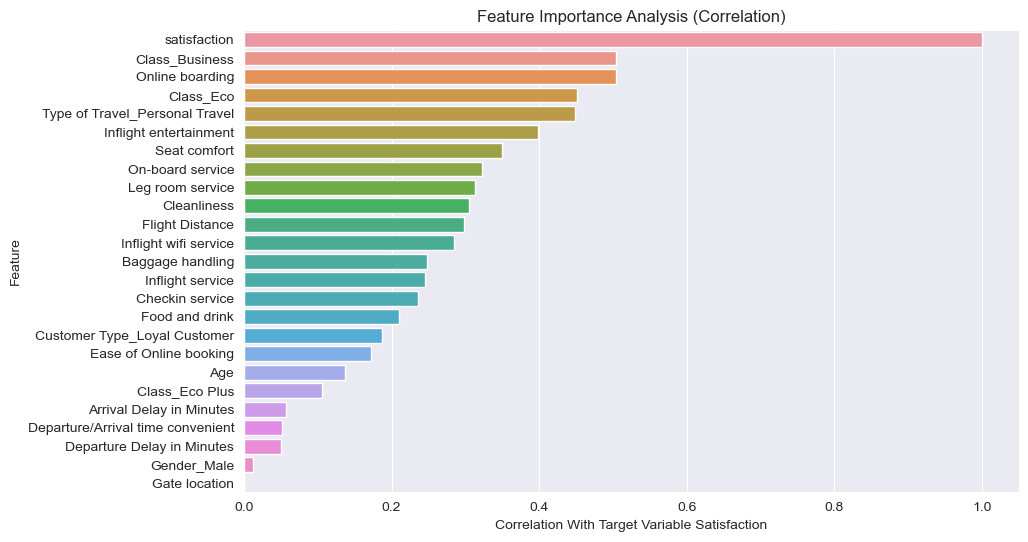

In [415]:
# Calculate the correlation matrix
correlation_matrix = encoded_airline.corr()

# Sort the correlations with respect to the target variable
correlation_with_target = correlation_matrix["satisfaction"].abs().sort_values(ascending=False)

# Plot the feature importances (correlation with the target variable satisfaction)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.xlabel("Correlation With Target Variable Satisfaction")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis (Correlation)")
plt.show()

Based on the chart above, we can see the factors which affect the satisfaction of a passenger based on the correlation analysis (correlation refers to the strength of the relationship between two variables and can be used to determine how one variable moves/changes in relation to another variable). In this analysis we see the top five factors which can be controlled by the airline are:

- Online Boarding
- Inflight Entertainment
- Seat Comfort
- On-Board Service
- Leg Room Service

I chose to focus on the factors which involved the rating system (0-5) since these are factors which the airline can improve on to boost passenger satisfacion.

#### Feature Importance With Random Forest Classifier

In [416]:
# importing libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [417]:
X = encoded_airline.drop('satisfaction',axis=1)
y = encoded_airline['satisfaction']

In [418]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,1,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,0,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,1,0,1,0,0


In [419]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [420]:
scaler = StandardScaler() # standardizing the data
scaled_X = scaler.fit_transform(X)
print(scaled_X)

[[-1.7452793  -0.73153876  0.20357895 ... -0.95690623 -0.90432653
   3.58677552]
 [-0.95136024 -0.95718354  0.20357895 ...  1.04503447 -0.90432653
  -0.27880195]
 [-0.88520032 -0.04758435 -0.54953343 ...  1.04503447 -0.90432653
  -0.27880195]
 ...
 [-0.62056063  0.8078601  -1.30264581 ...  1.04503447 -0.90432653
  -0.27880195]
 [-1.14984    -0.18999128 -1.30264581 ... -0.95690623  1.10579527
  -0.27880195]
 [-0.8190404   0.53508063 -1.30264581 ...  1.04503447 -0.90432653
  -0.27880195]]


In [421]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [422]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_train: (83123, 24)
shape of X_test: (20781, 24)
shape of y_train: (83123,)
shape of y_test: (20781,)


In [423]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [424]:
pred = rf.predict(X_test)

In [425]:
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.961358933641307


Obtained an accuracy score of 96%

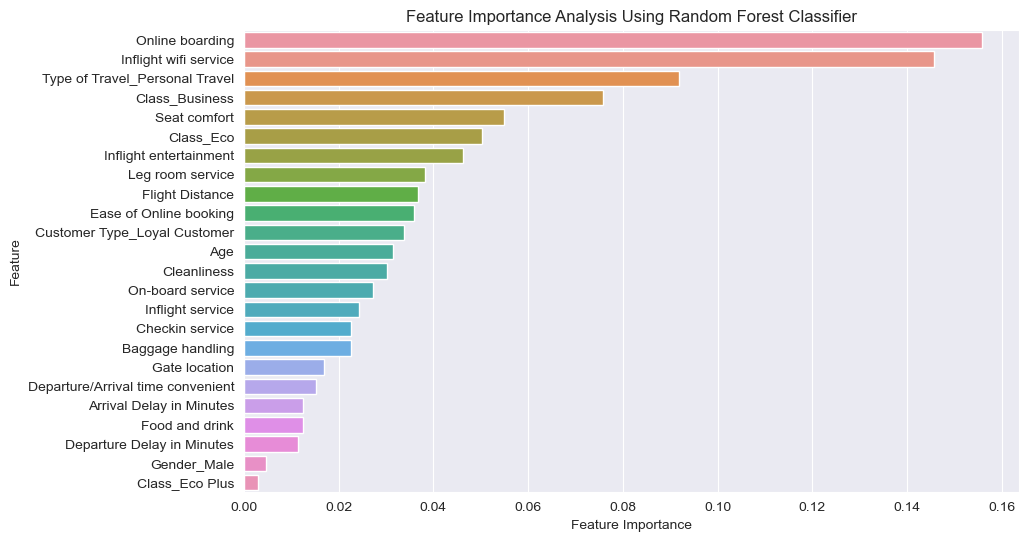

In [426]:
# Get feature importances
importances = rf.feature_importances_

# Create dataframe to hold feature importances
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort the features by importance 
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis Using Random Forest Classifier")
plt.show()

Based on the results of the feature importance by the random forest classifier we can see that the top five features are:
- Online Boarding
- Inflight Wifi Service
- Seat Comfort
- Inflight Entertainment
- Leg Room Service 

I initially expected the Inflight Wifi Service to be a significant factor based on my findings when investigating the feature independently.

#### Conclusion

Both the correlation analysis and the feature importance analysis using the random forest classifier yielded similar results with one change being the Inflight Wifi Service in the random forest classifier was a more important feature than On-Board Service in the correlation analysis. In conclusion, when analysing the factors which have a rating system that an airline can improve on to boost customer satisfaction, they can begin to focus on the following six factors:

- Online Boarding
- Inflight Wifi Service
- Seat Comfort
- Inflight Entertainment
- Leg Room Service
- On-Board Service